In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading ranking data for wood and steel roller coasters

In [5]:
wood_rcoasters = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel_rcoasters = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [6]:
wood_rcoasters.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [7]:
steel_rcoasters.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


Cheking data types 

In [8]:
wood_rcoasters.dtypes

Rank             int64
Name            object
Park            object
Location        object
Supplier        object
Year Built       int64
Points           int64
Year of Rank     int64
dtype: object

In [9]:
steel_rcoasters.dtypes

Rank             int64
Name            object
Park            object
Location        object
Supplier        object
Year Built       int64
Points           int64
Year of Rank     int64
dtype: object

## Writing a function for plotting the ranking of one roller coaster in time

There are some roller coasters with the same name, so we check the park name too.

In [10]:
def rank_rc(name, park, ranking_df):
    '''a function that will plot 
    the ranking of a given roller coaster 
    over time as a line'''
    
    coaster_data = ranking_df[(ranking_df.Name == name) & (ranking_df.Park == park)]
    y_ranks = coaster_data['Rank'].values
    years = coaster_data['Year of Rank'].values
    x = range(len(years))
    
    plt.plot(x, y_ranks)
    plt.gca().invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    title = name + "'s Rankings"
    plt.title(title)
    
    ax = plt.subplot()
    ax.set_xticks(x)
    ax.set_xticklabels(years)
    ax.set_yticks(range(1,4))
    
    plt.show()

<ipython-input-10-cec236cb03c0>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


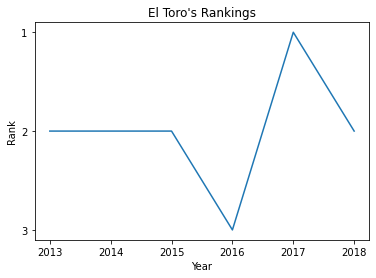

In [11]:
rank_rc("El Toro", "Six Flags Great Adventure", wood_rcoasters)

## Writing a function for plotting the ranking of two roller coasters in time

In [12]:
def rank_2rc(name1, park1, name2, park2, ranking_df):
    '''a function that will plot 
    the ranking of 2 given roller coasters 
    over time as lines'''
    
    coaster1_data = ranking_df[(ranking_df.Name == name1) & (ranking_df.Park == park1)]
    y1_ranks = coaster1_data['Rank'].values
    
    coaster2_data = ranking_df[(ranking_df.Name == name2) & (ranking_df.Park == park2)]
    y2_ranks = coaster2_data['Rank'].values
    
    years = coaster1_data['Year of Rank'].values
    x = range(len(years))
    
    plt.plot(x, y1_ranks, color='red')
    plt.plot(x, y2_ranks, color='orange')
    plt.gca().invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    title = name1 + "'s and " + name2 + "'s Rankings"
    plt.title(title)
    plt.legend([name1, name2], loc=8)
    
    ax = plt.subplot()
    ax.set_xticks(x)
    ax.set_xticklabels(years)
    ax.set_yticks(range(1,4))
    plt.show()

<ipython-input-12-6bca0e1f38aa>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


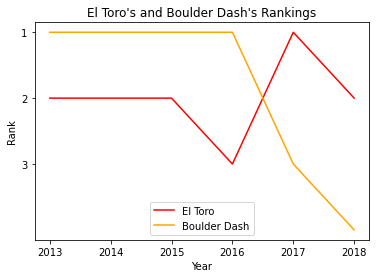

In [13]:
rank_2rc("El Toro", "Six Flags Great Adventure", "Boulder Dash", "Lake Compounce", wood_rcoasters)

## Writing a function for plotting the ranking of *n* top ranked roller coasters in time

In [83]:
def rank_top_rc(n, ranking_df):
    '''a function that will plot 
    the ranking of n top ranked 
    roller coasters over time as lines'''
    
    top_rc_data = ranking_df[ranking_df.Rank <= n]
    rc_names = top_rc_data.Name.unique().tolist()
    
    plt.figure(figsize=(8, 10))
    ax = plt.subplot()
    for name in rc_names:
        coaster_data = top_rc_data[top_rc_data.Name == name]        
        ax.plot(coaster_data['Year of Rank'], coaster_data.Rank, label=name)
    
    plt.gca().invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    title = "Top " + str(n) + " roller coasters rankings"
    plt.title(title)
    plt.legend(rc_names, loc=4)
    years = [2013, 2014, 2015, 2016, 2017, 2018]
    ax.set_xticks(years)
    ax.set_xticklabels(years)
    ax.set_yticks(range(1,n+1))
    plt.show()

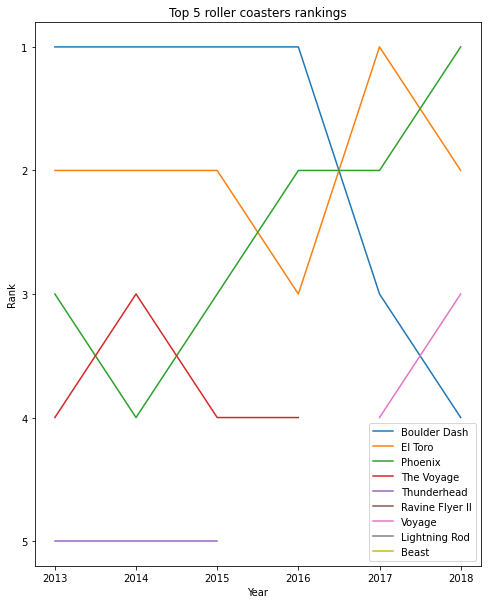

In [84]:
rank_top_rc(n=5, ranking_df=wood_rcoasters)

 ## Loading data from Captain Coaster 

In [85]:
cc_rcoasters = pd.read_csv('roller_coasters.csv')
cc_rcoasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [86]:
cc_rcoasters.dtypes

name               object
material_type      object
seating_type       object
speed             float64
height            float64
length            float64
num_inversions    float64
manufacturer       object
park               object
status             object
dtype: object

## Visualizing roller coasters' speed distribution

In [94]:
def plot_column(df, column): 
    x = cc_rcoasters[column].values
    plt.figure(figsize=(10, 8))
    

    plt.hist(x)
    plt.title(column.title() + " Distribution in Roller Coasters")
    plt.xlabel(column.title())
    plt.ylabel('Number')

    plt.show()

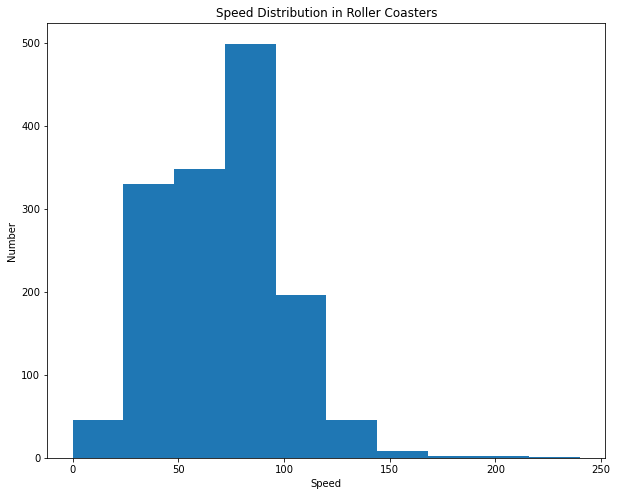

In [97]:
plot_column(df = cc_rcoasters, column='speed')

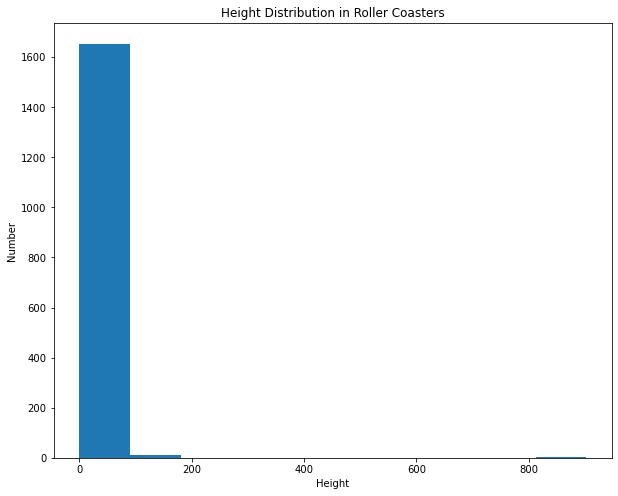

In [98]:
plot_column(df = cc_rcoasters, column='height')

Too wide range in "height", probably need to set plotting range manually.

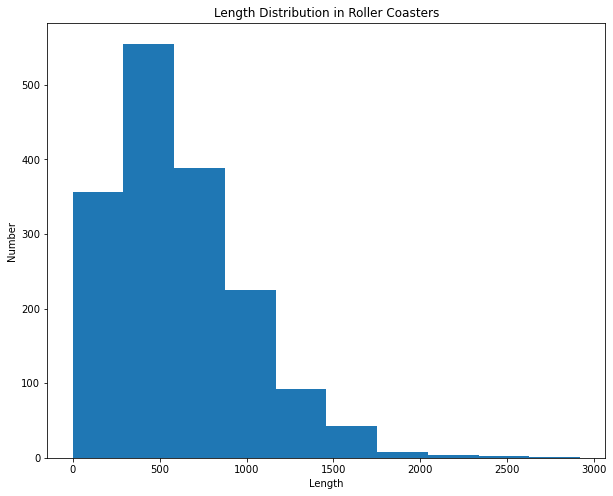

In [96]:
plot_column(df = cc_rcoasters, column='length')

## Creating bar chart showing the number of inversions for each roller coaster at an amusement park

In [113]:
def inversions_bar(df, park_name):
    park_data = df[df.park == park_name]
    park_data = park_data.sort_values('num_inversions', ascending=False)
    coasters_names = park_data.name.values
    coasters_invs = park_data.num_inversions.values
    
    plt.figure(figsize=(8, 10))
    ax = plt.subplot()
    ax.bar(coasters_names, coasters_invs)
    ax.set_xticks(range(len(coasters_names)))
    ax.set_xticklabels(coasters_names, rotation=90)
    plt.xlabel('Roller coaster')
    plt.ylabel('Number of inversions')
    plt.title("Number of inversions for each roller coaster in "+park_name)
    plt.show()

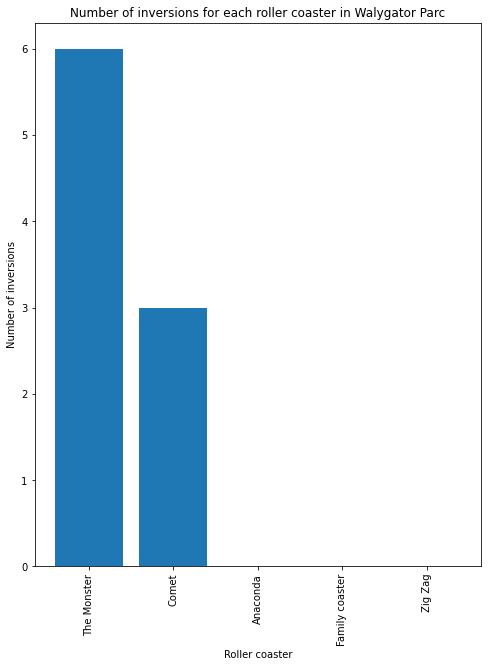

In [114]:
inversions_bar(df=cc_rcoasters, park_name="Walygator Parc")

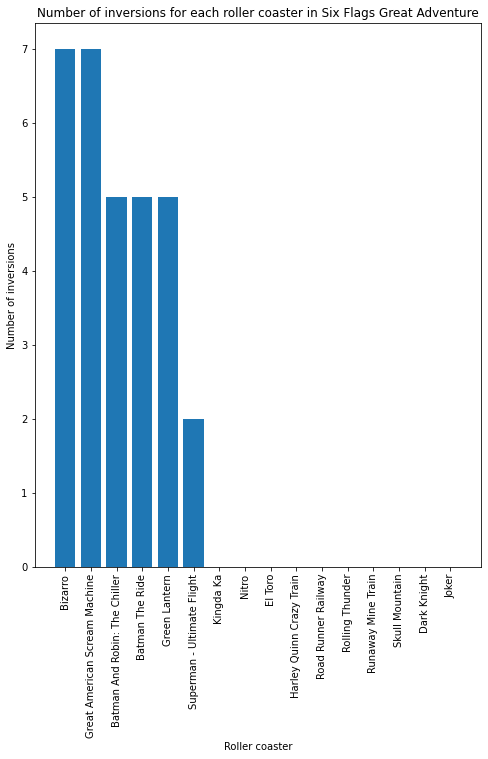

In [115]:
inversions_bar(df=cc_rcoasters, park_name="Six Flags Great Adventure")

## Creating a pie chart that compares the number of operating roller coasters

In [168]:
def pie_status(df):
    statuses = df.groupby(['status']).name.count()
    select = statuses.loc[['status.operating', 'status.closed.definitely']]
    plt.pie(select.values, labels=select.index, autopct='%d%%')
    plt.axis('equal')
    plt.title('Operating VS Closed Roller Coasters')
    plt.show()

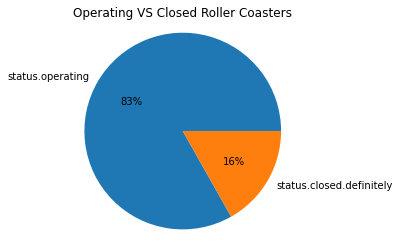

In [169]:
pie_status(cc_rcoasters)

## Creating a scatter plot

In [197]:
def scatter_two(df, col1, col2):
    x = df[col1].values
    y = df[col2].values
    plt.figure(figsize=(10, 8))

    plt.scatter(x, y, marker='d', c='royalblue', alpha=0.3)
    plt.title(col1.title() + " VS " + col2.title() + " of Roller Coasters")
    plt.xlabel(col1.title())
    plt.ylabel(col2.title())
    plt.legend(['Roller Coaster'], loc='upper left')

    plt.show()

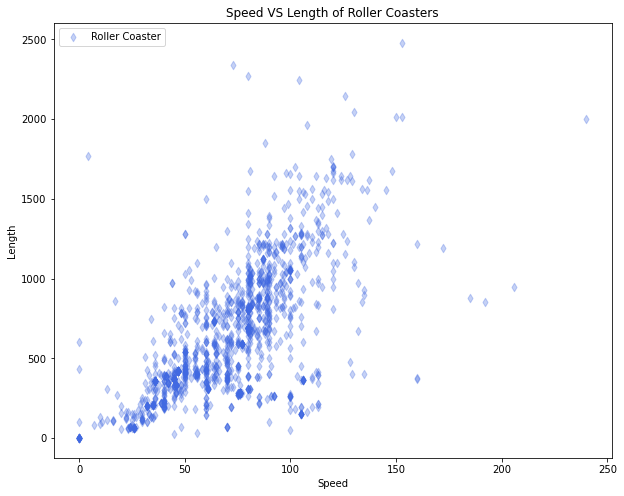

In [198]:
scatter_two(cc_rcoasters, "speed", "length")

## * Do different seating types result in higher/faster/longer roller coasters?

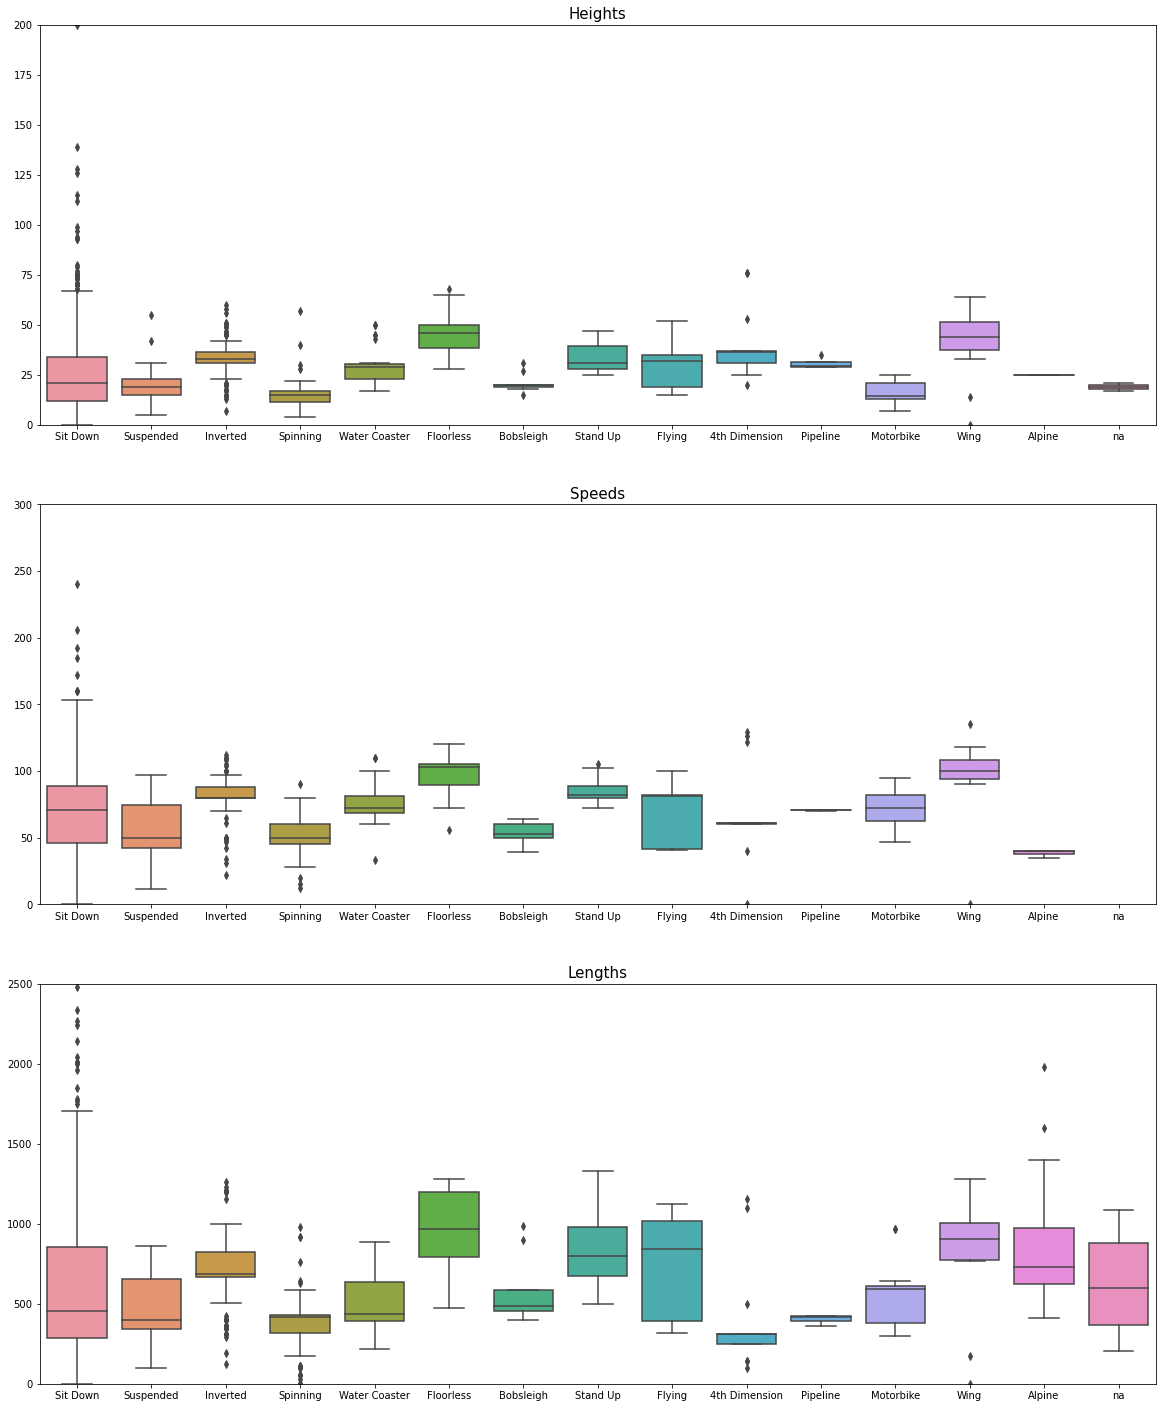

In [238]:
fig, axs = plt.subplots(3, 1, figsize=(20, 25), sharey=False)
axs[0].set(ylim=(0, 200))
axs[0].set_title('Heights', fontsize=15)
sns.boxplot(x=cc_rcoasters.seating_type.values, y=cc_rcoasters.height.values, ax=axs[0])
axs[1].set(ylim=(0, 300))
axs[1].set_title('Speeds', fontsize=15)
sns.boxplot(x=cc_rcoasters.seating_type.values, y=cc_rcoasters.speed.values, ax=axs[1])
axs[2].set(ylim=(0, 2500))
axs[2].set_title('Lengths', fontsize=15)
sns.boxplot(x=cc_rcoasters.seating_type.values, y=cc_rcoasters.length.values, ax=axs[2])
plt.show()